# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [123]:
df = pd.read_csv('haberman.data', header=None)
features = ['age', 'year_of_operation', 'auxillary_nodes', 'survived_5yr']
df.columns = features

In [124]:
df.isna().sum()

age                  0
year_of_operation    0
auxillary_nodes      0
survived_5yr         0
dtype: int64

In [125]:
df['survived_5yr'] = df['survived_5yr'].apply(lambda x: 1 if x > 1 else 0)
df.head()

,age,year_of_operation,auxillary_nodes,survived_5yr
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [126]:
df.describe()

,age,year_of_operation,auxillary_nodes,survived_5yr
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [127]:
age_bin = pd.cut(df['age'], 4)
op_year_bin = pd.cut(df['year_of_operation'], 4)
auxillary_bin = pd.cut(df['auxillary_nodes'], 4)

survived_5yr      0   1
age                    
(29.947, 43.25]  60  13
(43.25, 56.5]    84  40
(56.5, 69.75]    66  22
(69.75, 83.0]    15   6


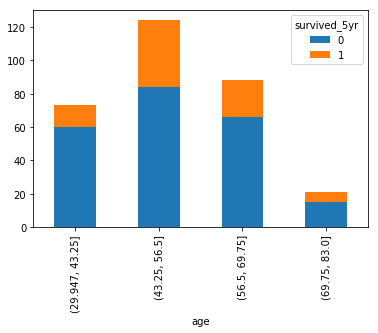

In [128]:
crosstab_age = pd.crosstab(age_bin, df['survived_5yr'])
print(crosstab_age)
crosstab_age.plot(kind='bar', stacked='true');

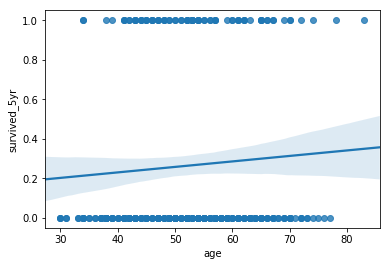

In [129]:
sns.regplot(df['age'], df['survived_5yr']);

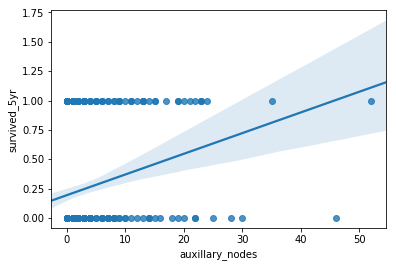

In [131]:
sns.regplot(df['auxillary_nodes'], df['survived_5yr']);

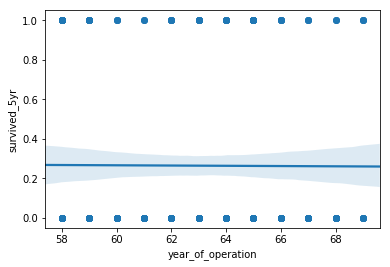

In [130]:
sns.regplot(df['year_of_operation'], df['survived_5yr']);

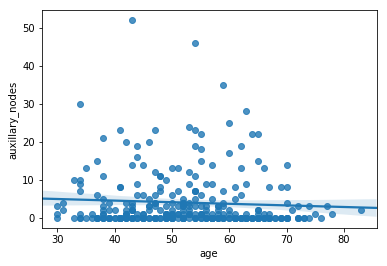

In [132]:
sns.regplot(df['age'], df['auxillary_nodes']);

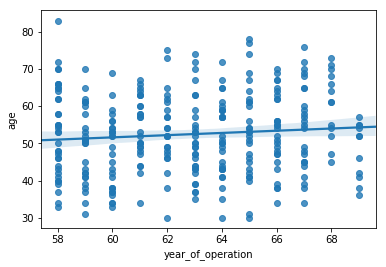

In [133]:
sns.regplot(df['year_of_operation'], df['age']);

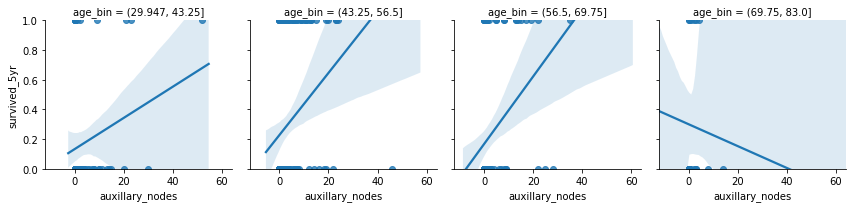

In [141]:
#auxillary vs survival binning for age

df['age_bin'] = age_bin
plot = sns.FacetGrid(df, col='age_bin')
plot.set(ylim=(0, 1.0)) #does this help or hurt looking at the data??
plot.map(sns.regplot, "auxillary_nodes", "survived_5yr");

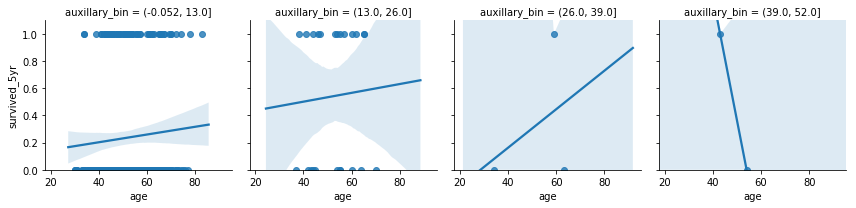

In [142]:
#age vs survival binning for auxillary
df['auxillary_bin'] = auxillary_bin
plot = sns.FacetGrid(df, col='auxillary_bin')
plot.set(ylim=(0, 1.1))
plot.map(sns.regplot, "age", "survived_5yr");

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

##### What is at least one feature that looks to have a positive relationship with survival?
Number of Auxilary nodes seems to have a positive relationship with survival

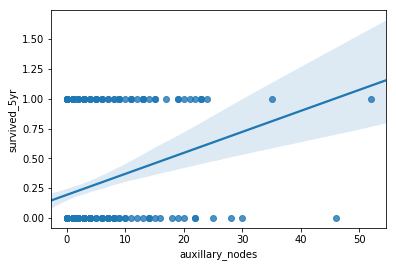

In [144]:
#auxillary vs survival
sns.regplot(df['auxillary_nodes'], df['survived_5yr']);

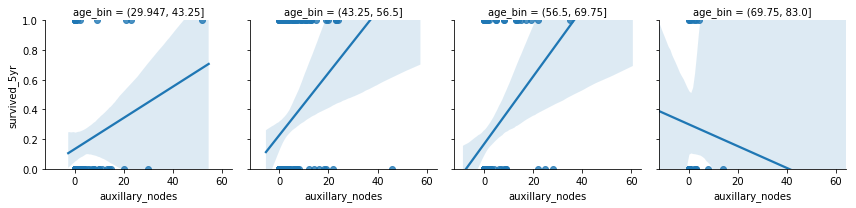

In [143]:
#auxillary vs survival binning for age

df['age_bin'] = age_bin
plot = sns.FacetGrid(df, col='age_bin')
plot.set(ylim=(0, 1.0)) #does this help or hurt looking at the data??
plot.map(sns.regplot, "auxillary_nodes", "survived_5yr");

##### What is at least one feature that looks to have a negative relationship with survival?
Both age, and number of auxillary nodes have a positive correlation with survival. Year of Operation appears to either have no relationship with survival, or if anything, can be positive or negative depending on age, as can be seen in the 'year vs survival binning for age'.

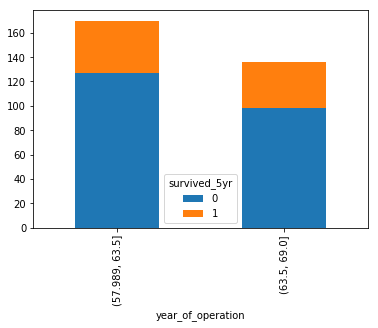

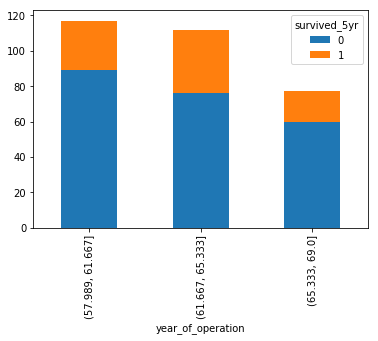

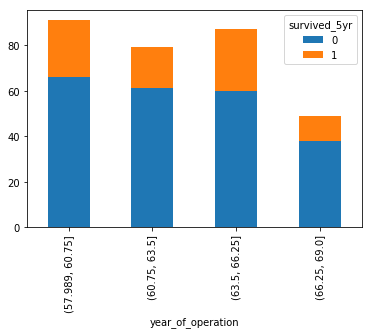

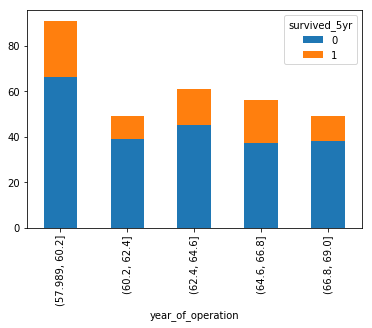

In [153]:
op_year_bin1 = pd.cut(df['year_of_operation'], 2)
op_year_bin2 = pd.cut(df['year_of_operation'], 3)
op_year_bin3 = pd.cut(df['year_of_operation'], 4)
op_year_bin4 = pd.cut(df['year_of_operation'], 5)

crosstab_op_year1 = pd.crosstab(op_year_bin1, df['survived_5yr'])
crosstab_op_year1.plot(kind='bar', stacked='true');

crosstab_op_year2 = pd.crosstab(op_year_bin2, df['survived_5yr'])
crosstab_op_year2.plot(kind='bar', stacked='true');

crosstab_op_year3 = pd.crosstab(op_year_bin3, df['survived_5yr'])
crosstab_op_year3.plot(kind='bar', stacked='true');

crosstab_op_year4 = pd.crosstab(op_year_bin4, df['survived_5yr'])
crosstab_op_year4.plot(kind='bar', stacked='true');

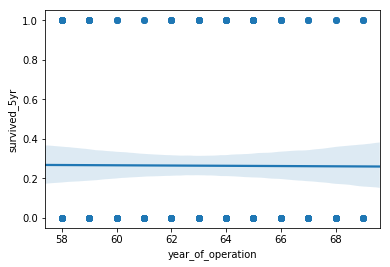

In [146]:
sns.regplot(df['year_of_operation'], df['survived_5yr']);

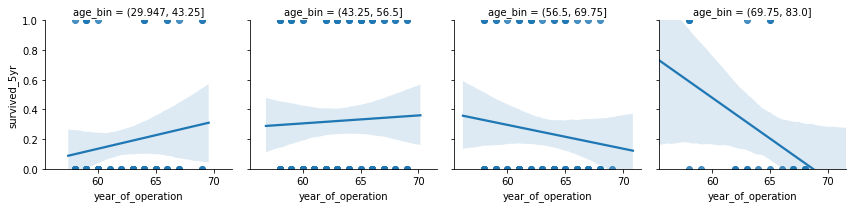

In [148]:
df['age_bin'] = age_bin
plot = sns.FacetGrid(df, col='age_bin')
plot.set(ylim=(0, 1.0))
plot.map(sns.regplot, "year_of_operation", "survived_5yr");

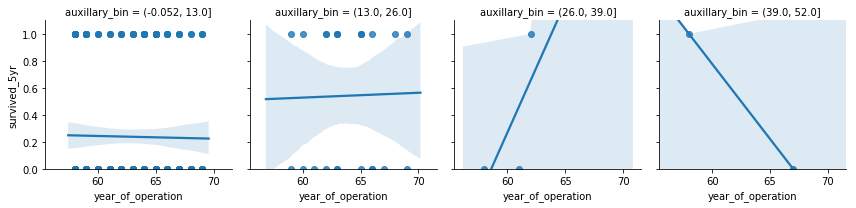

In [151]:
df['auxillary_bin'] = auxillary_bin
plot = sns.FacetGrid(df, col='auxillary_bin')
plot.set(ylim=(0, 1.1))
plot.map(sns.regplot, "year_of_operation", "survived_5yr");

##### How are those two features related with each other, and what might that mean?
Year of Operation appears to have a slight correlation with age (red) and no correlation with auxillary nodes (green). If Year of Operation has a positive correlation with age, and age has a positive correlation with survival, it could make year of operation appear to have a positive correlation with survival aswell.

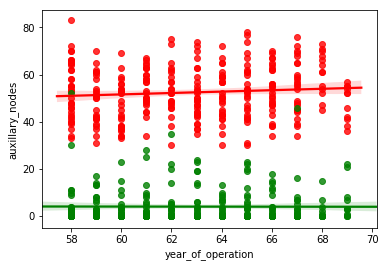

In [159]:
sns.regplot(df['year_of_operation'], df['age'], color='red');
sns.regplot(df['year_of_operation'], df['auxillary_nodes'], color='green');

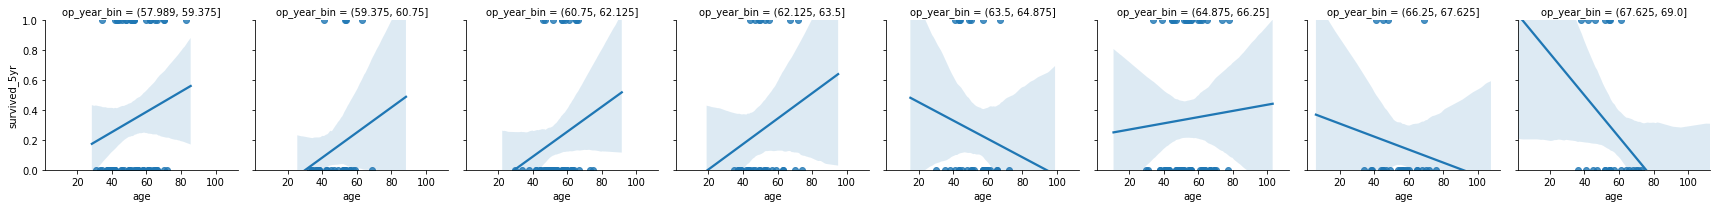

In [163]:
op_year_bin = pd.cut(df['year_of_operation'], 8)
df['op_year_bin'] = op_year_bin
plot = sns.FacetGrid(df, col='op_year_bin')
plot.set(ylim=(0, 1.0))
plot.map(sns.regplot, "age", "survived_5yr");

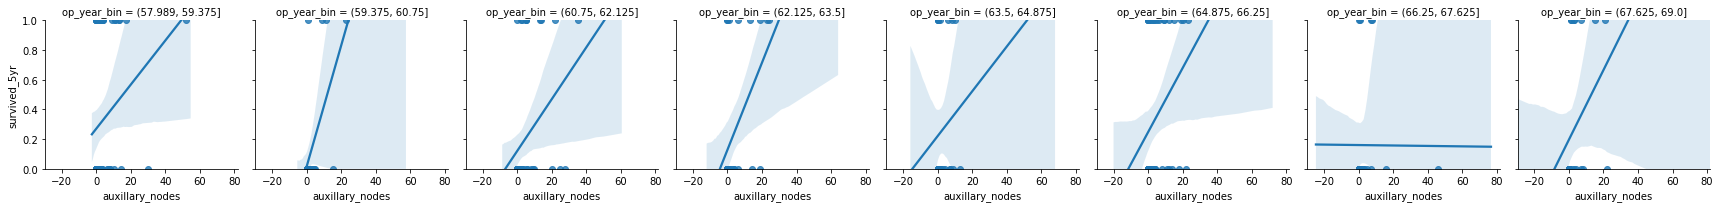

In [164]:
op_year_bin = pd.cut(df['year_of_operation'], 8)
df['op_year_bin'] = op_year_bin
plot = sns.FacetGrid(df, col='op_year_bin')
plot.set(ylim=(0, 1.0))
plot.map(sns.regplot, "auxillary_nodes", "survived_5yr");

# Interesting Observation

It appears that once you bin for Operation Year, age can have an either possitive or negative correlation with survival.

Operation Year does not effect auxillary node count.

## Questions

- How to take % of survival after binning a catagory. EX:

Have the cross table have feature % of survival

crosstab_op_year3 = pd.crosstab(op_year_bin3, df['survived_5yr'])

- Getting rid of multiple bias

Do you bin two variables, use 3d graphs? 